In [40]:
import pandas as pd
df = pd.read_csv('Tweets.csv')
df['Date'] = df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [41]:
len(df[df['Date'] > '2022-03-14'])

1693

In [39]:
len(df[df['Date'].dt.strftime('%Y-%m-%d') == '2022-03-16'])

AttributeError: Can only use .dt accessor with datetimelike values

In [27]:
len(df)

8224

In [32]:
df['Date'][0].date()

datetime.date(2022, 3, 29)

In [42]:
filtered_df = df.loc[(df['Date'] >= '2022-03-14')
                     & (df['Date'] < '2022-03-15')]

In [43]:
filtered_df

,Unnamed: 0,Date,Location,User,Tweet
1693,1693,2022-03-14,United States,ThreeCalories,I have discovered another bridge built by #Rus...
1694,1694,2022-03-14,A pale blue dot 🌍,dcminx,The sophisticated disinformation machinery Put...
1695,1695,2022-03-14,"Toronto, Utrecht, Lviv",GicAriana,Consider: Russia MANUFACTURED cause to invade ...
1696,1696,2022-03-14,San Francisco/New York,WIRED,The sophisticated disinformation machinery Put...
1697,1697,2022-03-14,"New York, NY",DeadlineWH,"""I don't see how [Tucker Carlson] can not unde..."
...,...,...,...,...,...
1863,1863,2022-03-14,NaN,RWApodcast,"*those* are the ""first chechen war, supported ..."
1864,1864,2022-03-14,"Washington, DC",thehill,US and Chinese officials to meet in Rome to di...
1865,1865,2022-03-14,United States of America,WhiteHouse,"Today, @POTUS spoke with President Emmanuel Ma..."
1866,1866,2022-03-14,Australia,caitoz,Ukraine is still accepting foreign volunteer r...


In [48]:
df['Tweet'].tolist()

["another reminder of what has long been obvious:\n\nin the war between Ukraine and Russia, between Western freedom and authoritarian aggression, Donald Trump is on the anti-American side\n\nhe's the former president,\nbut not only that\n\nTrump is the leader of the Republican Party TODAY https://t.co/JLfqZbncV8",
 'Putin on the goal of Russia\'s special operation: "Its goal is to protect people who have been subjected to bullying and genocide by the Kiev regime for eight years. And for this we will strive for the demilitarization and denazification of #Ukraine." https://t.co/FxvPOkedfn',
 '.@DeputySecState: Russia’s bombardment of Ukraine’s cities and critical infrastructure has created one of the fastest-growing humanitarian crises. Russian forces have laid siege to cities like Mariupol, where citizens have been left without food, water, heat, or electricity. https://t.co/fzdx8CerpR',
 'Ukraine strikes Russia on its HOME COURT!  WOW this is huge news.   Also is just more reason to gi

In [64]:
def process(data_al):
    data=[]
    data_al=data_al[:(len(data_al)-(len(data_al)%10))]
    from azure.core.credentials import AzureKeyCredential
    from azure.ai.textanalytics import TextAnalyticsClient

    credential = AzureKeyCredential("62c5e36b53944bf09eb953445d6d2a7e")
    text_analytics_client = TextAnalyticsClient(endpoint="https://cloudprojnlp.cognitiveservices.azure.com/", credential=credential)
    # documents = ["I hated the movie. It was so slow!", "The movie made it into my top ten favorites. What a great movie!"]

    c = 0
    res=[]
    while(c<len(data_al)-1):
        result = text_analytics_client.analyze_sentiment(data_al[c:c+10], show_opinion_mining=True)
        docs = [doc for doc in result if not doc.is_error]
#         print(len(docs))
        res.extend(docs)
        print([c,c+10])
        c+=10
    print("Length:",len(res))
    print("Let's visualize the sentiment of each of these documents")
    for idx, doc in enumerate(res):
#         print(doc)
        data.append([doc.confidence_scores.positive,doc.confidence_scores.neutral,doc.confidence_scores.negative])
    return data


In [65]:
from datetime import date, timedelta
data_dict={}
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2022, 2, 14)
end_date = date(2022, 3, 30)
for single_date in daterange(start_date, end_date):
    data = df[df['Date'].dt.strftime('%Y-%m-%d') == str(single_date)]['Tweet'].tolist()
    data_dict[single_date] = process(data)

[0, 10]
[10, 20]
[20, 30]
Length: 30
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
Length: 60
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
Length: 30
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
Length: 50
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
Length: 70
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
Length: 70
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
Length: 60
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
[70, 80]
[80, 90]
[90, 100]
[100, 110]
[110, 120]
[120, 130]
[130, 140]
[140, 150]
[150, 160]
[160, 170]
[170, 180]
Length: 180
Let's vi

[120, 130]
[130, 140]
Length: 140
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
[70, 80]
[80, 90]
[90, 100]
[100, 110]
[110, 120]
[120, 130]
[130, 140]
[140, 150]
[150, 160]
[160, 170]
Length: 170
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
[70, 80]
[80, 90]
[90, 100]
[100, 110]
[110, 120]
[120, 130]
Length: 130
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
[70, 80]
[80, 90]
[90, 100]
[100, 110]
[110, 120]
[120, 130]
[130, 140]
[140, 150]
[150, 160]
[160, 170]
Length: 170
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]
[60, 70]
[70, 80]
[80, 90]
[90, 100]
[100, 110]
[110, 120]
[120, 130]
Length: 130
Let's visualize the sentiment of each of these documents
[0, 10]
[10, 20]
[20, 30]
[30, 40]
[40, 50]
[50, 60]


In [66]:
data_dict

{datetime.date(2022, 2, 14): [[0.01, 0.09, 0.9],
  [0.01, 0.1, 0.89],
  [0.02, 0.08, 0.9],
  [0.08, 0.5, 0.42],
  [0.0, 0.02, 0.97],
  [0.03, 0.8, 0.17],
  [0.01, 0.07, 0.92],
  [0.01, 0.01, 0.98],
  [0.0, 0.03, 0.97],
  [0.01, 0.06, 0.93],
  [0.01, 0.04, 0.95],
  [0.01, 0.04, 0.96],
  [0.03, 0.73, 0.24],
  [0.02, 0.26, 0.72],
  [0.0, 0.03, 0.96],
  [0.02, 0.06, 0.92],
  [0.04, 0.55, 0.41],
  [0.07, 0.8, 0.13],
  [0.01, 0.04, 0.95],
  [0.01, 0.24, 0.74],
  [0.02, 0.31, 0.67],
  [0.29, 0.04, 0.67],
  [0.0, 0.0, 0.99],
  [0.01, 0.03, 0.96],
  [0.01, 0.07, 0.91],
  [0.02, 0.12, 0.86],
  [0.02, 0.11, 0.88],
  [0.02, 0.19, 0.79],
  [0.01, 0.04, 0.95],
  [0.01, 0.1, 0.89]],
 datetime.date(2022, 2, 15): [[0.02, 0.12, 0.87],
  [0.01, 0.1, 0.89],
  [0.45, 0.1, 0.45],
  [0.02, 0.34, 0.64],
  [0.01, 0.03, 0.96],
  [0.01, 0.09, 0.89],
  [0.73, 0.13, 0.14],
  [0.02, 0.8, 0.18],
  [0.01, 0.07, 0.92],
  [0.02, 0.23, 0.75],
  [0.01, 0.06, 0.93],
  [0.01, 0.22, 0.77],
  [0.02, 0.21, 0.77],
  [0.03, 0.4

In [98]:
start_date = date(2022, 2, 24)
end_date = date(2022, 3, 30)
overall_sentiment=[]
for single_date in daterange(start_date, end_date):
    overall_sentiment.append(np.mean(np.asarray(data_dict[single_date]),axis=0))
    
    

In [83]:
np.asarray(overall_sentiment)[:,2]

array([0.77041284, 0.74554902, 0.76852273, 0.7514    , 0.78064706,
       0.78370968, 0.76536667, 0.80223077, 0.7997619 , 0.77376471,
       0.7597    , 0.7635    , 0.78563158, 0.817625  , 0.76258824,
       0.80964706, 0.813     , 0.749     , 0.78141176, 0.77230769,
       0.76323529, 0.74669231, 0.78716667, 0.79588889, 0.81281818,
       0.79422222, 0.7904    , 0.78218182, 0.70223077, 0.758     ,
       0.7795    , 0.810875  , 0.78188889, 0.71909091])

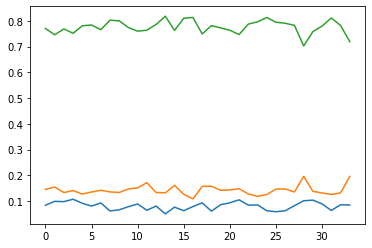

In [103]:
import pandas as pd
from matplotlib import pyplot as plt

plt.plot(np.asarray(overall_sentiment)[:,0])
plt.plot(np.asarray(overall_sentiment)[:,1])
plt.plot(np.asarray(overall_sentiment)[:,2])
 
plt.show()

In [89]:
start_date = date(2022, 2, 24)
end_date = date(2022, 3, 30)
overall_sentiment=[]
count = 0
for single_date in daterange(start_date, end_date):
    count+=1

In [90]:
count

34

In [96]:
a=np.asarray(overall_sentiment)[:,2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [99]:
overall_sentiment

[array([0.08409174, 0.14577064, 0.77041284]),
 array([0.09937255, 0.15511765, 0.74554902]),
 array([0.09811364, 0.13331818, 0.76852273]),
 array([0.10745, 0.1412 , 0.7514 ]),
 array([0.09176471, 0.12767647, 0.78064706]),
 array([0.08083871, 0.13554839, 0.78370968]),
 array([0.0931    , 0.14223333, 0.76536667]),
 array([0.062     , 0.13596154, 0.80223077]),
 array([0.06633333, 0.13366667, 0.7997619 ]),
 array([0.07864706, 0.14758824, 0.77376471]),
 array([0.08905, 0.1514 , 0.7597 ]),
 array([0.06461111, 0.17188889, 0.7635    ]),
 array([0.081     , 0.13378947, 0.78563158]),
 array([0.0505   , 0.1320625, 0.817625 ]),
 array([0.07676471, 0.16117647, 0.76258824]),
 array([0.06305882, 0.12664706, 0.80964706]),
 array([0.07913333, 0.10886667, 0.813     ]),
 array([0.09335714, 0.1575    , 0.749     ]),
 array([0.06111765, 0.15782353, 0.78141176]),
 array([0.08630769, 0.14230769, 0.77230769]),
 array([0.09370588, 0.14347059, 0.76323529]),
 array([0.10515385, 0.14846154, 0.74669231]),
 array([0